In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2

plt.rcParams["savefig.bbox"] = 'tight'

# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)

c:\Users\nicola\anaconda3\envs\cvcs-fashion\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] Impossibile trovare la procedura specificata'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\nicola\anaconda3\envs\cvcs-fashion\Lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve fut

## Geometric Transforms
Geometric image transformation refers to the process of altering the geometric properties of an image,
such as its shape, size, orientation, or position.
It involves applying mathematical operations to the image pixels or coordinates to achieve the desired transformation.

In [2]:
from PIL import Image
import os

# Cartella contenente le immagini
folder_path = f"{os.getcwd()}/../dataset/polyvore_outfit/images"

# Lista per salvare le immagini
images = []

# Imposta un limite al numero di immagini da caricare
load_limit = 500
extensions_allowed = ('.png', '.jpg', '.jpeg', '.gif', '.bmp')

# Legge tutte le immagini nella cartella
for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith(extensions_allowed) and i < load_limit:  
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        images.append(img)

In [3]:
len(images)

500

### RandomPerspective
The :class:`~torchvision.transforms.RandomPerspective` transform
(see also :func:`~torchvision.transforms.functional.perspective`)
performs random perspective transform on an image.



In [5]:
perspective_transformer = v2.RandomPerspective(distortion_scale=0.6, p=1.0)
out_folder = f"{os.getcwd()}/../dataset/polyvore_outfit/fine_tuned_images"
perspective_new_images = [
    perspective_transformer(image).save(f"{out_folder}/{str(i+3001)}.jpg") for i, image in enumerate(images)
]

### RandomAffine
The :class:`~torchvision.transforms.RandomAffine` transform
(see also :func:`~torchvision.transforms.functional.affine`)
performs random affine transform on an image.



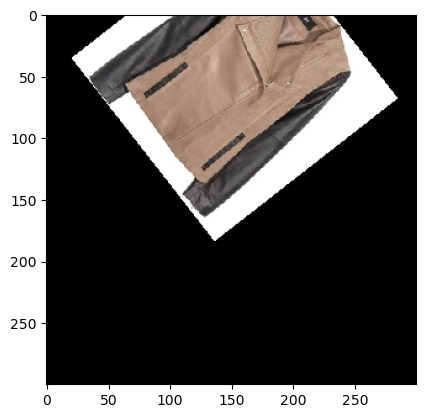

In [7]:
affine_transfomer = v2.RandomAffine(
    degrees=(20, 70),
    translate=(0.1, 0.35),
    scale=(0.55, 0.85)
)
affine_imgs = affine_transfomer(images[35])
plt.imshow(affine_imgs)
plt.show()

In [8]:
new_images = [
    affine_transfomer(image).save(f"{out_folder}/{str(i+3501)}.jpg") for i, image in enumerate(images)
]

## Randomly-applied Transforms

The following transforms are randomly-applied given a probability ``p``.  That is, given ``p = 0.5``,
there is a 50% chance to return the original image, and a 50% chance to return the transformed image,
even when called with the same transform instance!

### RandomHorizontalFlip
The :class:`~torchvision.transforms.RandomHorizontalFlip` transform
(see also :func:`~torchvision.transforms.functional.hflip`)
performs horizontal flip of an image, with a given probability.



In [9]:
hflipper = v2.RandomHorizontalFlip(p=1.0)
new_images = [
    hflipper(image).save(f"{out_folder}/{str(i+4001)}.jpg") for i, image in enumerate(images)
]